## 1. Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


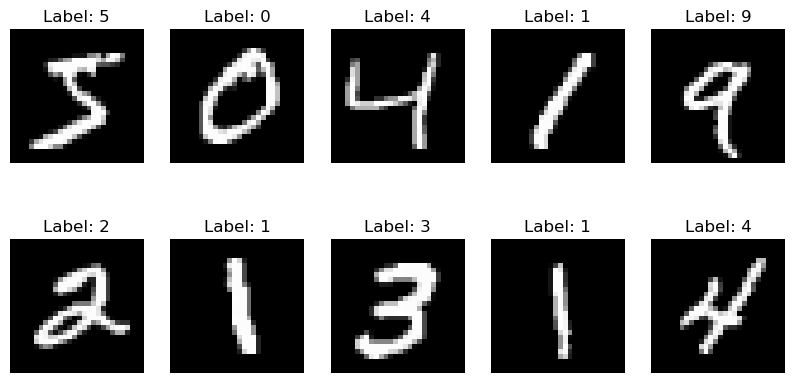

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Comment: Here we load the data and split it into the appropriate training and test data.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

#Comment: We need to normlaize the pixels to values between [0, 1.0]. This makes the images easier for neural networks work with, and should get us faster results with small gradients
# and fewer weight-related anomalies. We specifically divide by 255 because the data is in the form of integers, between the values [0, 255]. We also set their type to float so we can 
# access decimal values less than 1.
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Comment: Reshape the data to a flat 1D array of size(length x width) (the images are 28 pixels long and 28 wide). This is necessary because for recurrent or feed-forward neural networks, 
# each neuron in the input layer represents one pixel of the image. This setup allows a neural network to analyze the color intensity of each pixel to understand the image
# it's looking at. Some neural network architectures, like CNNs, are specifically designed for images, and thus don't require flattened arrays.

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

#Comment: Simply use matplotlib to showcase a sample of images with their labels. Overall, pretty basic stuff here. The loop is used to create subplots of 2 rows and 5 columns.
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
!pip install tensorflow

## Build the Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the neural network model
#Write you code here. Define "model" using Sequential, Input and Dense

# I made a neural network with 4 hidden layers. They descend in values of 512, 256, 128, and 64. This is to refine the learning of the model to a more precise level.
# Additionally, since I have 4 layers with many neurons, and I'm also running the model with 50 epochs, there is bound to be some overfitting. To combat this, I introduced batch-normalization,
# l2 regularization, and dropout to each layer of the model.
# Also notice that the input has 784 neurons- this is for each pixel of a 28 X 28 image. The output layer has 10 neurons which represent the labels/decisions for numbers 0 to 9.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
model = Sequential(
    [
        Input((784,), name="input"),  

        Dense(512, activation="relu", kernel_regularizer=l2(0.00001), name="layer0"), 
        BatchNormalization(name="batchnorm0"), 
        Dropout(0.35, name="dropout0"), 

        Dense(256, activation="relu", kernel_regularizer=l2(0.00001), name="layer1"), 
        BatchNormalization(name="batchnorm1"), 
        Dropout(0.45, name="dropout1"), 

        Dense(128, activation="relu", kernel_regularizer=l2(0.00001), name="layer2"), 
        BatchNormalization(name="batchnorm2"), 
        Dropout(0.30, name="dropout2"), 

        Dense(64, activation="relu", kernel_regularizer=l2(0.00001), name="layer3"), 
        BatchNormalization(name="batchnorm3"), 
        Dropout(0.30, name="dropout3"), 

        Dense(10, activation="softmax", name="output") 
    ]
)

model.summary()


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer0 (Dense)                  │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm0 (BatchNormalization) │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout0 (Dropout)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm1 (BatchNormalization) │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm2 (BatchNormalization) │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm3 (BatchNormalization) │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Train the Neural Network

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7629 - loss: 0.7692 - val_accuracy: 0.9597 - val_loss: 0.1464
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9246 - loss: 0.2740 - val_accuracy: 0.9663 - val_loss: 0.1238
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9415 - loss: 0.2166 - val_accuracy: 0.9719 - val_loss: 0.1128
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9496 - loss: 0.1998 - val_accuracy: 0.9767 - val_loss: 0.1039
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9548 - loss: 0.1814 - val_accuracy: 0.9731 - val_loss: 0.1134
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9584 - loss: 0.1722 - val_accuracy: 0.9779 - val_loss: 0.1019
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9595 - loss: 0.1677 - val_accuracy: 0.9778 - val_loss: 0.1021
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9634 - loss: 0.1612 -

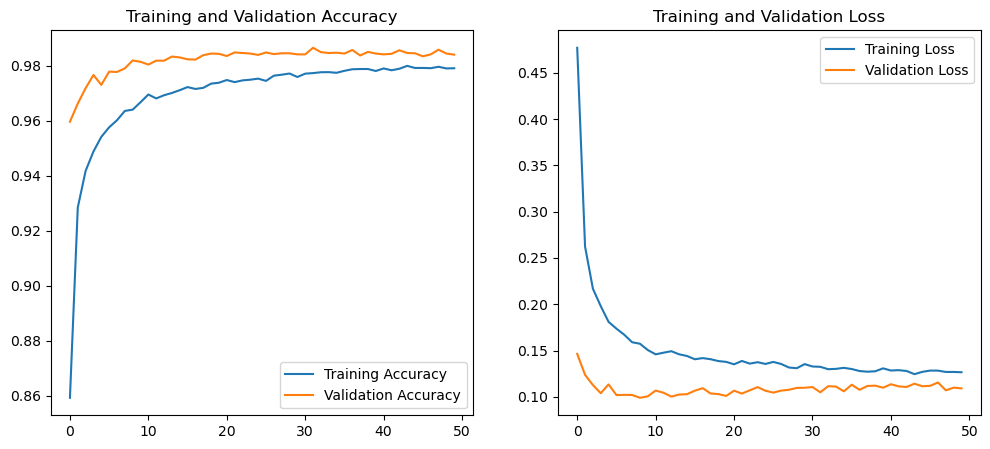

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#Comment: tensorflow.keras models need to be compiled. When we compile, we include important parameters for the model to use.
# Adam() is .keras's stochastic gradient descent function (SGD). SGD is how neural networks can update their weights and biases.
# Gradients themselves are computed from loss. Cross-entropy is the loss technique used to calculate the loss for each prediction, which is mainly used for classification models.
# And, of course, accuracy is simply how many predictions the model got right over wrong.
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Comment: Checkpoints is a neat tool that allow models and their progress to be stored and used later. 
# In our case, we store the best (via save_best_only = true) model found during training, and we judge the model being the best off of the highest accuracy (known as 'val_accuracy'
# and mode=max tells the code to look for the highest accuracy).
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

#Comment: Fit the model, or in other words, train it! X_train contains numerical data, while y_train contains the labels. X_test and y_test (similar to X_train and y_train)
# are what we use to test the model on. Epochs, or the amount of times we send the total training data through the model, is set to 10. And for each epoch, we send the data through 
# 32 units at a time (batch_size = 32). Finally, the callbacks tell the program to store the best model or iteration based off the conditions set by our checkpoint earlier.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=40, callbacks=[checkpoint])

#Comment: Create the Training and Validation Accuracy graph. We have 1 row and 2 columns.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#Comment: Create the Training and Validation Loss graph and show both graphs using plt.show().
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.1147
Test Accuracy: 0.9866
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



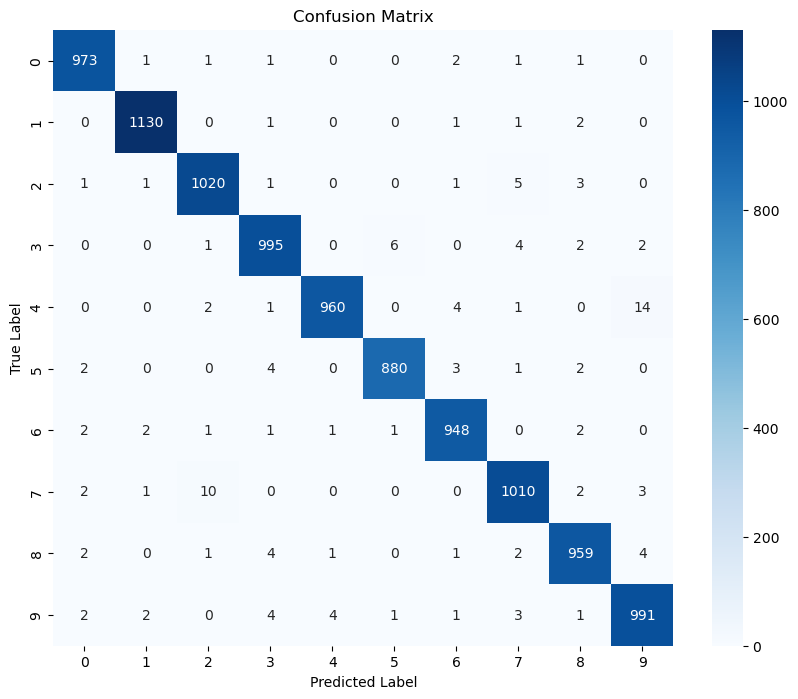

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

#Comment: With the best model we stored earlier during training, we test it with the testing data. What is returned is the loss and accuracy from the evaluation.
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Comment: Here, we get the predicted labels with best model found during training. predict() is differnt from evaluate() in this aspect: it returns the predictions. evaluate() on the other
# hand simply returns us some metrics.
# The returned predictions are in a 2D array shape, and each row contains prediction confidence levels that indicate how confident the model thinks a certain image is a certain number.
# We take the highest of these (using argmax) and assume that level is the model's final guess (in ther words, the model's prediction for that particular element of y_data).
# Then, we print the predictions into a classification report. The report will return us some metrics, namely precision, recall, and f1-score.
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

#Comment: We create a confusion matrix with the test data and information gathered.
cm = confusion_matrix(y_test, y_pred_classes)

#Comment: We then show the confusion matrix, but first we attach it to a heatmap with appropriate coloring and axis/tiles labeling. This makes the confusion matrix more
# readable and pretty.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions

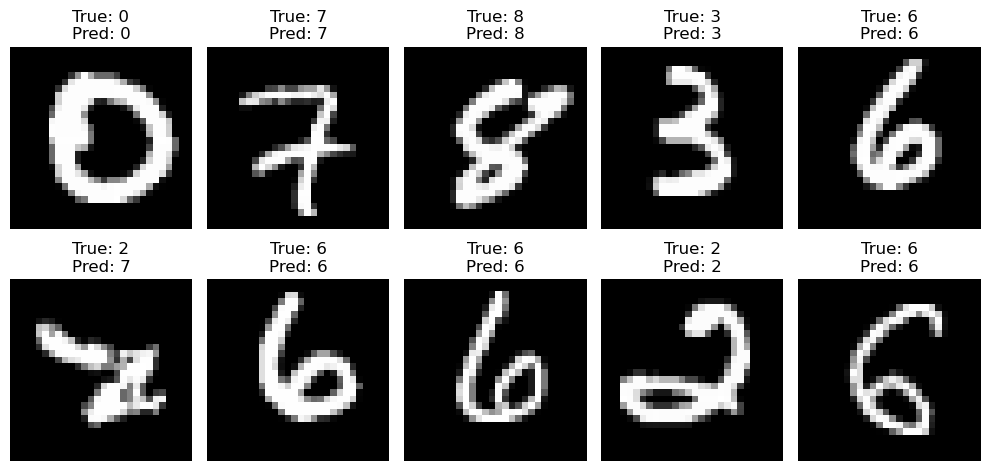

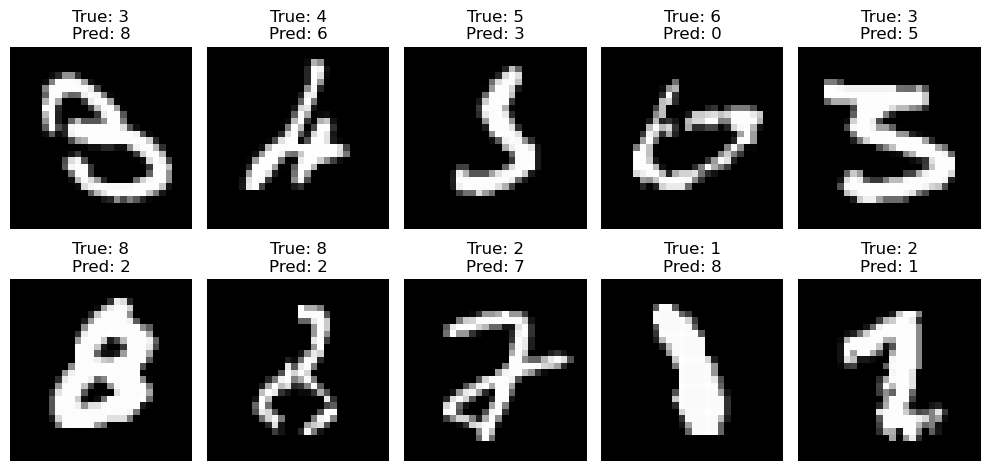

In [ ]:
#Comment: Gather 10 random elements from X_test.
indices = np.random.choice(len(X_test), 10, replace=False)

#Comment: Print out the 10 random elements with their true and predicted labels. The loop fills 2 rows and 5 columns with images.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Comment: Gather all incorrect indicies, where y_test does not match the predicted label.
incorrect_indices = np.where(y_test != y_pred_classes)[0]

#Comment: Get the first 10 images with the incorrect predictions and show them. Display their true and predicted labels.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
